In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [18]:
# Step 1: Generate Sample Monthly Sales Data
np.random.seed(42)
months = pd.date_range(start='2019-01-01', periods=36, freq='M')
trend = np.linspace(50, 150, 36)  # Simulated upward trend
seasonality = 20 * np.sin(np.linspace(0, 2 * np.pi, 12))  # Simulated seasonality (annual)
seasonality = np.tile(seasonality, 3)  # Repeat for 3 years
noise = np.random.normal(0, 10, 36)  # Random noise
months

<ipython-input-18-01602115389b>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  months = pd.date_range(start='2019-01-01', periods=36, freq='M')


DatetimeIndex(['2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31',
               '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31',
               '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
               '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31'],
              dtype='datetime64[ns]', freq='ME')

In [12]:
sales = trend + seasonality + noise  # Combine all components to form sales data
sales

array([ 54.96714153,  62.28731619,  80.383811  ,  93.59815597,
        74.20202917,  67.57899585,  77.30033416,  62.5593558 ,
        48.36597016,  62.94724624,  63.12443529,  76.77127389,
        86.705337  ,  78.82287105,  90.94346158, 107.0306964 ,
       100.700966  , 107.34855303,  86.71367954,  75.04768579,
       102.00291599,  89.54959709, 102.71960855, 101.46680385,
       113.12760133, 133.35061367, 130.96841842, 150.69626616,
       139.10860459, 135.5748565 , 124.06256846, 141.97921893,
       121.49717034, 115.51596509, 144.55548991, 137.7915635 ])

In [13]:
# Create DataFrame
data = pd.DataFrame({'Month': months, 'Sales': sales})
data.set_index('Month', inplace=True)
data

,Sales
Month,
2019-01-31,54.967142
2019-02-28,62.287316
2019-03-31,80.383811
2019-04-30,93.598156
2019-05-31,74.202029
2019-06-30,67.578996
2019-07-31,77.300334
2019-08-31,62.559356
2019-09-30,48.365970


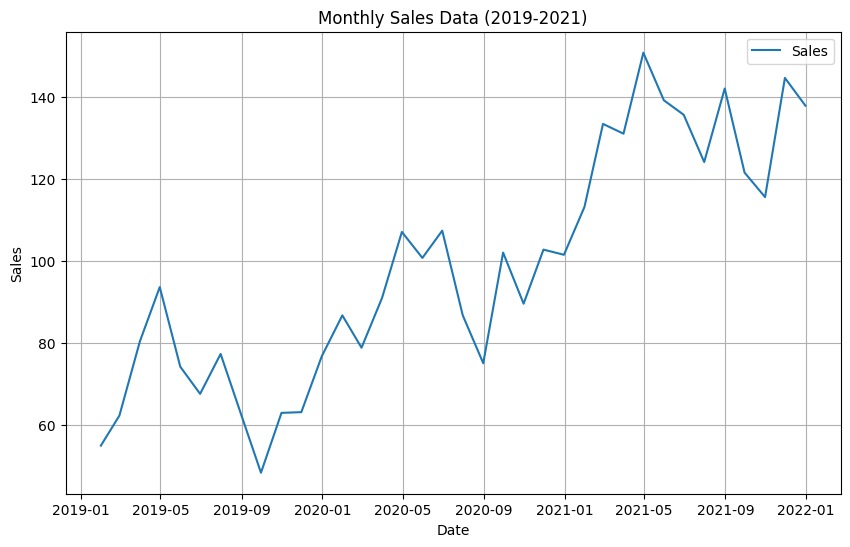

In [17]:
# Step 2: Visualize the Data
plt.figure(figsize=(10, 6)) #inches -> not cm
plt.plot(data, label='Sales')
plt.title('Monthly Sales Data (2019-2021)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

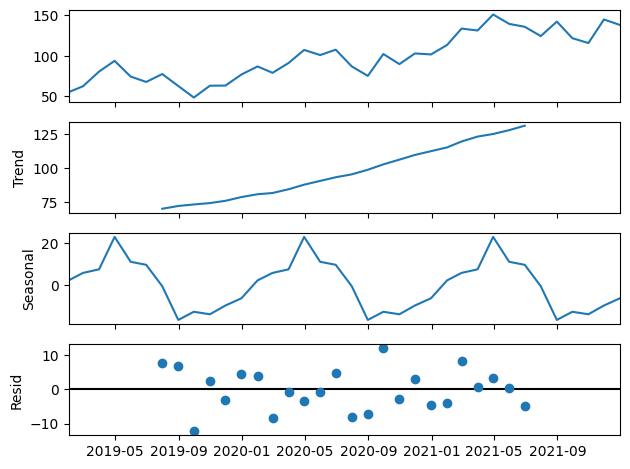

In [6]:
# Step 3: Decompose the Time Series
decomposition = seasonal_decompose(data, model='additive')
decomposition.plot()
plt.show()
# What is the difference between 2 graphs of Trend? -> Figure it out

In [19]:
# Step 4: Build and Fit an Exponential Smoothing Model (ETS)
model = ExponentialSmoothing(data['Sales'], trend='add', seasonal='add', seasonal_periods=12)
fit_model = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


In [22]:
# Step 5: Forecast the Next 12 Months
forecast = fit_model.forecast(12)
forecast

,0
2022-01-31,152.953330
2022-02-28,160.256793
2022-03-31,170.244854
2022-04-30,187.258527
2022-05-31,175.454294
2022-06-30,174.878109
2022-07-31,167.951945
2022-08-31,165.635339
2022-09-30,163.533547
2022-10-31,162.679726


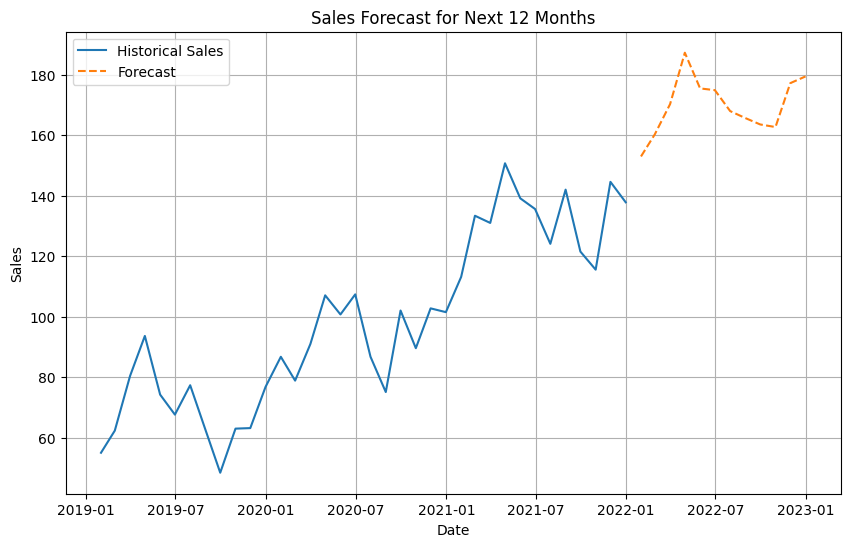

In [9]:
# Step 6: Plot the Historical Data with Forecast
plt.figure(figsize=(10, 6))
plt.plot(data, label='Historical Sales')
plt.plot(forecast, label='Forecast', linestyle='--')
plt.title('Sales Forecast for Next 12 Months')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
# Step 7: Evaluate Model Performance
historical_forecast = fit_model.fittedvalues
mae = mean_absolute_error(data['Sales'], historical_forecast)
rmse = np.sqrt(mean_squared_error(data['Sales'], historical_forecast))

In [24]:
# Output the MAE and RMSE values
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

Mean Absolute Error (MAE): 6.45
Root Mean Squared Error (RMSE): 8.04
